## Seth TIQC File

In [44]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [2]:
# import .csv/excel files
filepath='/home/seth/Documents/tech_incubator/survey_responses/'
post_survey_1 = pd.read_excel(filepath+'Post-InternshipServeyResponses.xlsx', sheet_name="Form Responses 1")
post_survey_2 = pd.read_excel(filepath+'TIQC_Post-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")
pre_survey = pd.read_excel(filepath+'Pre-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")

In [3]:
column_names_post_survey_1 = [
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Leadership ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Ability to work in a team ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Writing Effectively ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Speaking Effectively ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Problem Solving ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Initiative ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Analytical/Quantitative ]'
]
column_names_pre_survey = [
    'How comfortable are you with the following workplace skills? [Leadership ]',
    'How comfortable are you with the following workplace skills? [Ability to work in a team ]',
    'How comfortable are you with the following workplace skills? [Writing Effectively ]',
    'How comfortable are you with the following workplace skills? [Speaking Effectively ]',
    'How comfortable are you with the following workplace skills? [Problem Solving ]',
    'How comfortable are you with the following workplace skills? [Initiative ]',
    'How comfortable are you with the following workplace skills? [Analytical/Quantitative ]'
]
valid_responses = [
    'Extremely Uncomfortable',
    'Moderately Uncomfortable',
    'Neutral',
    'Moderately Comfortable',
    'Extremely Comfortable'
]

In [5]:
#for col in column_names_post_survey_1:
#    post_survey_1 = post_survey_1[post_survey_1[col].isin(valid_responses)]
#for col in column_names_pre_survey:
#    pre_survey = pre_survey[pre_survey[col].isin(valid_responses)]

In [13]:
print(post_survey_1.shape)
print(pre_survey.shape)

21
(176, 13)


In [124]:
paired_data = []
for col_pre, col_post in zip(column_names_pre_survey, column_names_post_survey_1):
    output_post1 = post_survey_1[post_survey_1[[col_post]][col_post].isin(valid_responses)].groupby(
        col_post, as_index=True)[col_post].count().to_frame().rename(columns={col_post: 'count'})
    output_pre = pre_survey[pre_survey[[col_pre]][col_pre].isin(valid_responses)].groupby(col_pre, as_index=True)[
        col_pre].count().to_frame().rename(columns={col_pre: 'count'})
    joined_data = output_post1.join(
        other=output_pre, how='outer', lsuffix="_post_survey", rsuffix="_pre_survey")
    joined_data.count_post_survey = joined_data.count_post_survey.fillna(
        0).astype(int)
    joined_data = joined_data.reindex(valid_responses)

    paired_data.append([col_pre, col_post, joined_data])

In [125]:
pre_survey_size = pre_survey.shape[0]
post_survey_size = post_survey_1.shape[0]
for pair in paired_data:
    print(pair[0], post_survey_size-pair[2]['count_post_survey'].sum(), pre_survey_size-pair[2]['count_pre_survey'].sum())

How comfortable are you with the following workplace skills? [Leadership ] 0 5
How comfortable are you with the following workplace skills? [Ability to work in a team ] 1 0
How comfortable are you with the following workplace skills? [Writing Effectively ] 2 3
How comfortable are you with the following workplace skills? [Speaking Effectively ] 1 4
How comfortable are you with the following workplace skills? [Problem Solving ] 0 4
How comfortable are you with the following workplace skills? [Initiative ] 1 3
How comfortable are you with the following workplace skills? [Analytical/Quantitative ] 2 4


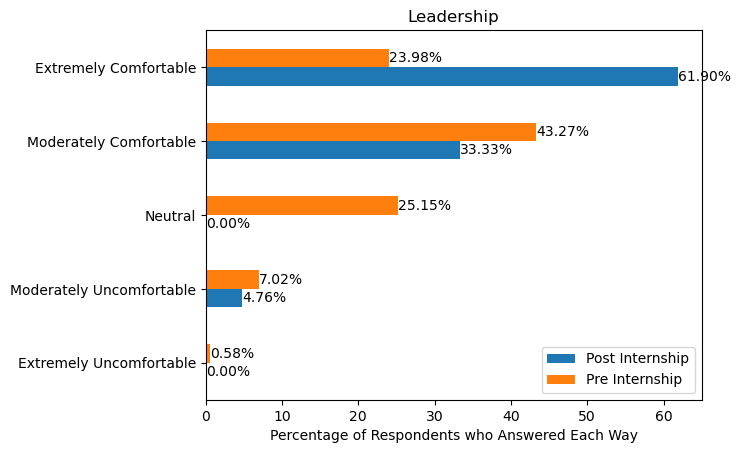

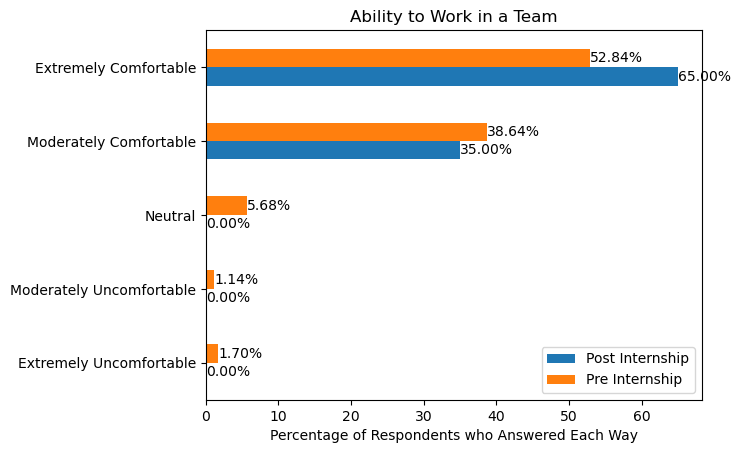

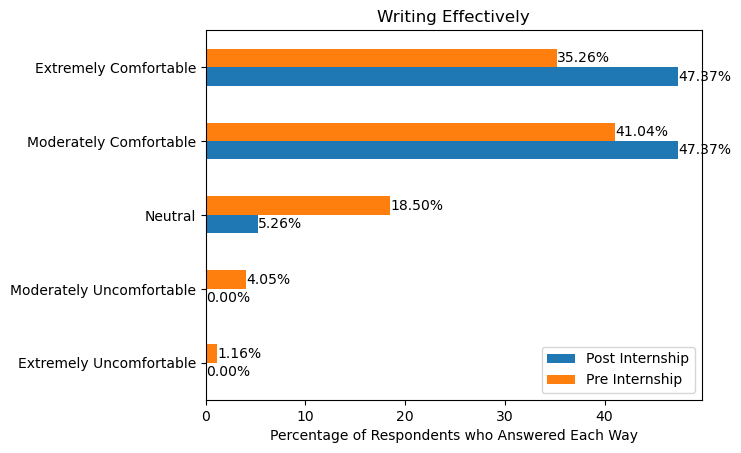

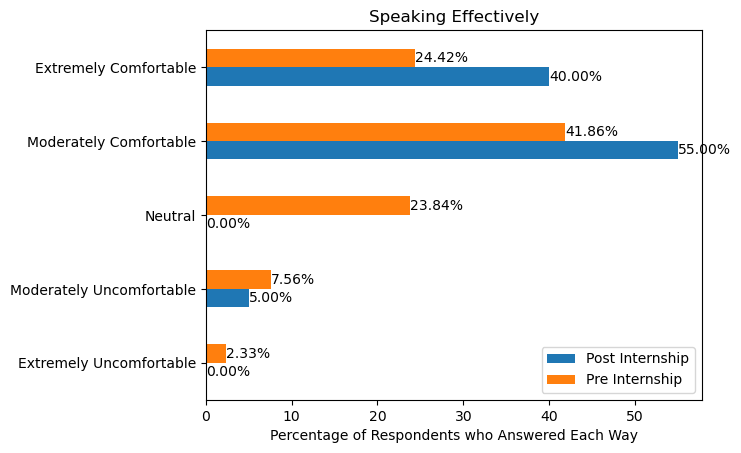

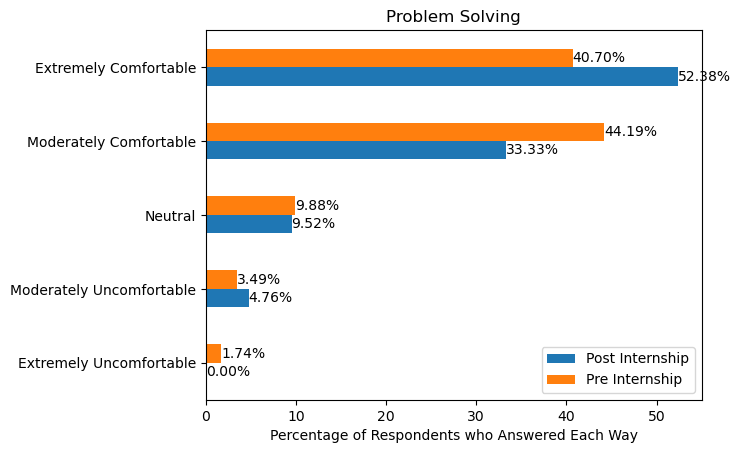

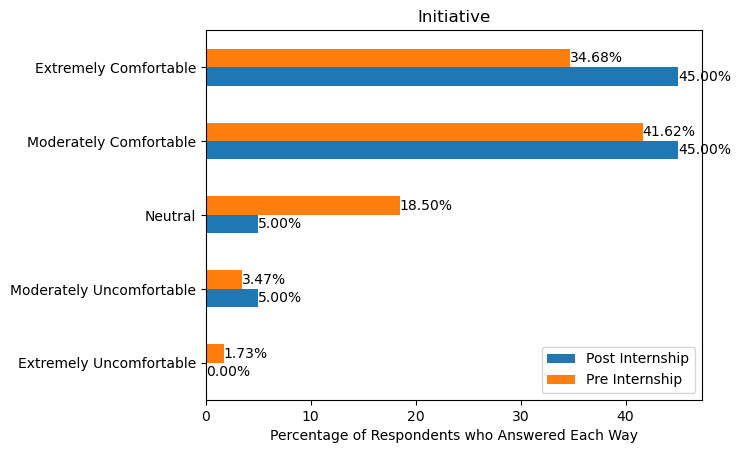

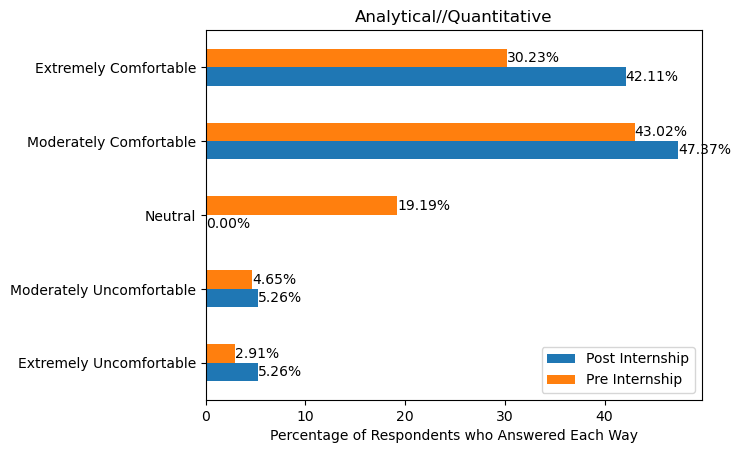

In [143]:
titles = ['Leadership', 'Ability to Work in a Team', 'Writing Effectively', 'Speaking Effectively', 'Problem Solving', 'Initiative', 'Analytical//Quantitative']
for obj, t in zip(paired_data, titles):
    df = pd.DataFrame(obj[2])
    cols = df.columns
    df[cols] = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)
    df.rename(columns={'count_pre_survey':'Pre Internship', 'count_post_survey':'Post Internship'}, inplace=True)

    ax = df.plot(kind='barh', stacked=False, title=t)

    for bars in ax.containers:
        ax.bar_label(container=bars, fmt='%.2f%%', label_type='edge')
    ax.legend(loc='lower right')
    ax.set_xlabel('Percentage of Respondents who Answered Each Way')

    plt.savefig(fname = './images/bar_' + obj[0].replace("l/Q", "l_Q") + '.png', dpi=300, bbox_inches='tight')    

In [ ]:
# pie charts
#ax.set_xlabel("Percent who answered")
    #ax.set_ylabel("Answer options")
    #ax.legend(loc='lower right')
    #ax.xaxis.grid()

    #plt.savefig(fname = './images/pie_' + obj[0].replace("l/Q", "l_Q") + '.png', dpi=300, bbox_inches='tight')

    #plt.close()

In [43]:
for obj in paired_data:
    print(obj[2])

                          count_post_survey  count_pre_survey
Extremely Uncomfortable            0.000000          0.584795
Moderately Uncomfortable           4.761905          7.017544
Neutral                            0.000000         25.146199
Moderately Comfortable            33.333333         43.274854
Extremely Comfortable             61.904762         23.976608
                          count_post_survey  count_pre_survey
Extremely Uncomfortable                 0.0          1.704545
Moderately Uncomfortable                0.0          1.136364
Neutral                                 0.0          5.681818
Moderately Comfortable                 35.0         38.636364
Extremely Comfortable                  65.0         52.840909
                          count_post_survey  count_pre_survey
Extremely Uncomfortable            0.000000          1.156069
Moderately Uncomfortable           0.000000          4.046243
Neutral                            5.263158         18.497110
Moderate

In [129]:
for obj in paired_data:
    fvalue, pvalue = stats.f_oneway(obj[2].count_pre_survey, obj[2].count_post_survey)
    print(obj[0], fvalue, pvalue)

How comfortable are you with the following workplace skills? [Leadership ] 5.2423112767940365 0.051296116817457965
How comfortable are you with the following workplace skills? [Ability to work in a team ] 2.6564785503765957 0.14177642540151306
How comfortable are you with the following workplace skills? [Writing Effectively ] 4.8105476673428 0.05961383531041195
How comfortable are you with the following workplace skills? [Speaking Effectively ] 6.154501864677679 0.038062565989189716
How comfortable are you with the following workplace skills? [Problem Solving ] 3.52138996138996 0.09742304090253144
How comfortable are you with the following workplace skills? [Initiative ] 4.739623405547682 0.061141290922987555
How comfortable are you with the following workplace skills? [Analytical/Quantitative ] 5.326279863481228 0.04985430884680186


In [135]:
for obj in paired_data:
    fvalue, pvalue = stats.kendalltau(obj[2].count_post_survey, obj[2].count_pre_survey)
    print(obj[0], pvalue)

How comfortable are you with the following workplace skills? [Leadership ] 0.44848886103153174
How comfortable are you with the following workplace skills? [Ability to work in a team ] 0.05220363534131463
How comfortable are you with the following workplace skills? [Writing Effectively ] 0.0367138563627041
How comfortable are you with the following workplace skills? [Speaking Effectively ] 0.07697417298126674
How comfortable are you with the following workplace skills? [Problem Solving ] 0.08333333333333333
How comfortable are you with the following workplace skills? [Initiative ] 0.0367138563627041
How comfortable are you with the following workplace skills? [Analytical/Quantitative ] 0.206507295485425


In [46]:
for obj in paired_data:
    my_mannwhitneyu, p = mannwhitneyu(obj[2].count_post_survey, obj[2].count_pre_survey, method='exact')
    print(obj[0], p)

How comfortable are you with the following workplace skills? [Leadership ] 0.09523809523809523
How comfortable are you with the following workplace skills? [Ability to work in a team ] 0.15079365079365079
How comfortable are you with the following workplace skills? [Writing Effectively ] 0.09523809523809523
How comfortable are you with the following workplace skills? [Speaking Effectively ] 0.031746031746031744
How comfortable are you with the following workplace skills? [Problem Solving ] 0.09523809523809523
How comfortable are you with the following workplace skills? [Initiative ] 0.09523809523809523
How comfortable are you with the following workplace skills? [Analytical/Quantitative ] 0.09523809523809523


In [112]:
paired_data[1][2]

,count_post_survey,count_pre_survey
Extremely Uncomfortable,0.0,1.704545
Moderately Uncomfortable,0.0,1.136364
Neutral,0.0,5.681818
Moderately Comfortable,35.0,38.636364
Extremely Comfortable,65.0,52.840909


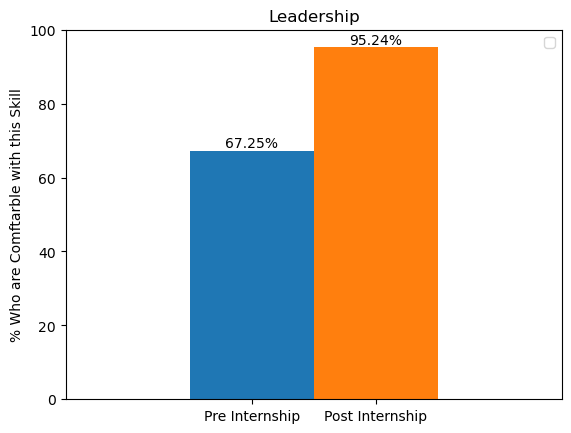

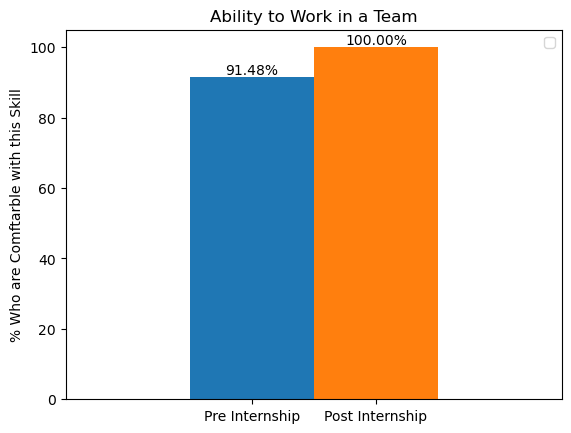

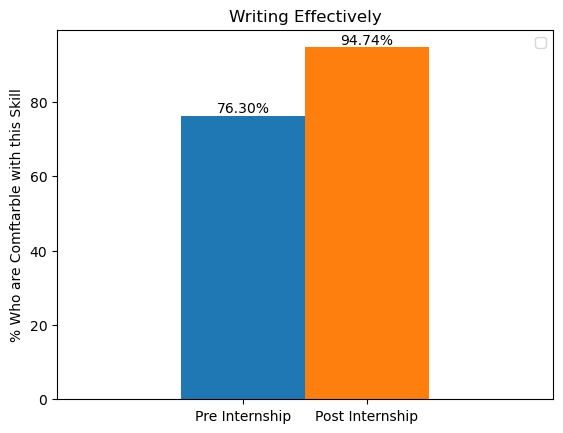

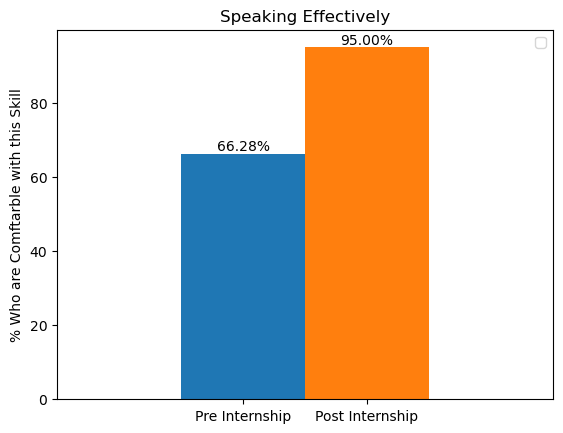

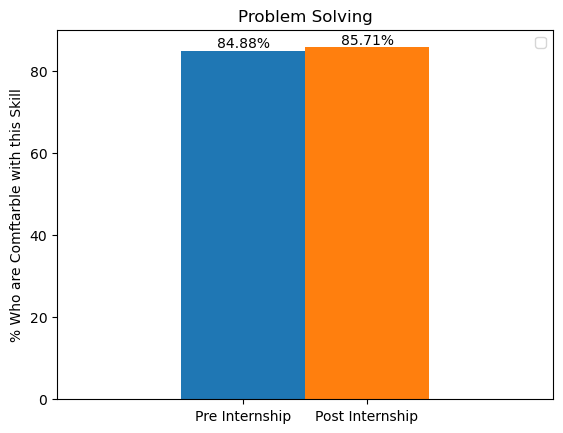

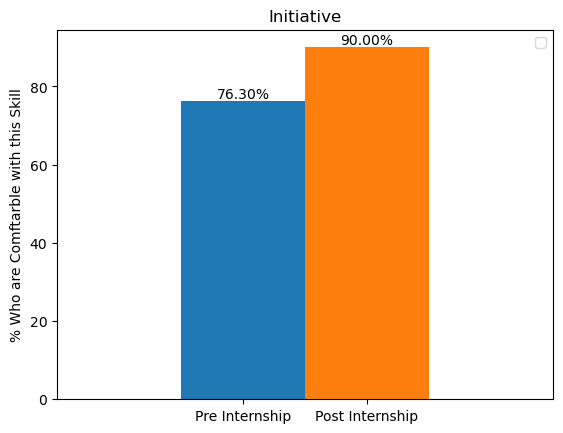

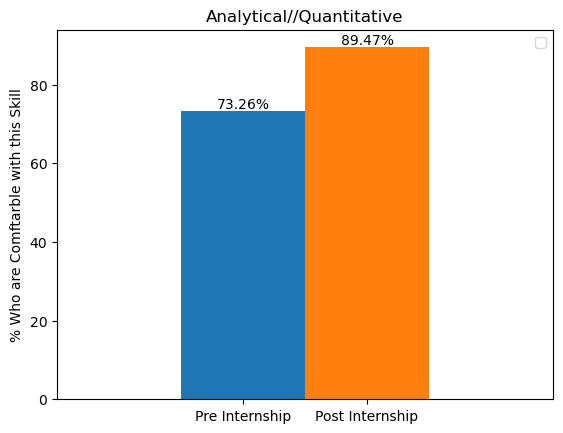

In [144]:
#paired_data[0][2].transpose()[['Extremely Comfortable', 'Moderately Comfortable']].transpose().sum().plot(kind='bar', stacked=False, title=obj[0])
titles = ['Leadership', 'Ability to Work in a Team', 'Writing Effectively', 'Speaking Effectively', 'Problem Solving', 'Initiative', 'Analytical//Quantitative']
for obj, t in zip(paired_data, titles):
    df = obj[2].transpose()[['Extremely Comfortable', 'Moderately Comfortable']].transpose().sum().to_frame().transpose()
    df = df.rename(columns={'count_post_survey':'Post Internship', 'count_pre_survey':'Pre Internship'})
    df = df[['Pre Internship', 'Post Internship']]
    ax = df.plot(kind='bar', stacked=False, title=t, rot=0)
    ax.set_xticks([-.125, .125])
    ax.set_xticklabels(['Pre Internship', 'Post Internship'])
    ax.set_ylabel('% Who are Comftarble with this Skill')
    for bars in ax.containers:
        ax.bar_label(container=bars, fmt='%.2f%%', label_type='edge')
    ax.legend(labels=[])

    plt.savefig(fname = './images/comfort_comparison_charts/' + obj[0].replace("l/Q", "l_Q") + '.png', dpi=300, bbox_inches='tight')    